<a href="https://colab.research.google.com/github/flaviagaia/PR/blob/main/PR_NN_compt_proc_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gensim
from gensim.models import Word2Vec


In [ ]:
df = pd.read_excel('competencias.xlsx')

In [ ]:
df.info()

In [ ]:
df.head(10)

,orgao_no_unidade_organizacional,n1_no_unidade_organizacional,n2_no_unidade_organizacional,n3_id_unidade_organizacional,n3_sg_unidade_organizacional,tx_competencia,tx_competencia_texto
0,"Agência Nacional do Petróleo, Gás Natural e Bi...",Diretoria II,Núcleo de Fiscalização da Medição da Produção ...,14673,NFP,I - PROPOR A REGULAMENTAÇÃO RELATIVA AOS PROCE...,PROPOR A REGULAMENTAÇÃO RELATIVA AOS PROCEDIME...
1,"Agência Nacional do Petróleo, Gás Natural e Bi...",Diretoria II,Superintendência de Desenvolvimento e Produção,21355,SDP,I - PROPOR A REGULAMENTAÇÃO E EXECUTAR A FISCA...,PROPOR A REGULAMENTAÇÃO E EXECUTAR A FISCALIZA...
2,Departamento Nacional de Obras Contra as Secas,Diretoria de Infraestrutura Hídrica,Divisão de Obras,42713,DI/DOB/ES,I - ACOMPANHAR E ORIENTAR AS UNIDADES REGIONAI...,I ACOMPANHAR E ORIENTAR AS UNIDADES REGIONAIS...
3,Fundação Nacional de Saúde,Departamento de Engenharia de Saúde Pública,Coordenação-Geral de Engenharia,23148,Cgear,I - ELABORAR NORMAS E ORIENTAÇÕES RELATIVAS À ...,I ELABORAR NORMAS E ORIENTAÇÕES RELATIVAS À A...
4,Instituto Brasileiro do Meio Ambiente e dos Re...,Diretoria de Licenciamento Ambiental,Coordenação-Geral de Licenciamento Ambiental d...,36182,COEXP,A INSTRUÇÃO PROCESSUAL E A EXECUÇÃO DAS ANÁLIS...,A INSTRUÇÃO PROCESSUAL E A EXECUÇÃO DAS ANÁLIS...
5,"Instituto Federal de Educação, Ciência e Tecno...",Campus Poços de Caldas,Diretoria de Administração e Planejamento,128275,DAP-PÇS,COMPETE À DIRETORIA DE ADMINISTRAÇÃO E PLANEJA...,COMPETE À DIRETORIA DE ADMINISTRAÇÃO E PLANEJA...
6,"Instituto Federal de Educação, Ciência e Tecno...",Campus Poços de Caldas,Diretoria de Desenvovimento Educacional,154854,CEX-DDEPÇS,COMPETE À COORDENADORIA DE EXTENSÃO:\nI. VIABI...,COMPETE À COORDENADORIA DE EXTENSÃO:\nI VIABIL...
7,"Ministério da Ciência, Tecnologia e Inovações",Museu Paraense Emílio Goeldi,Coordenação de Administração,41765,SEPZO,"I - GERENCIAR, CONSERVAR E COMUNICAR CONHECIME...",I GERENCIAR CONSERVAR E COMUNICAR CONHECIMENT...
8,Ministério do Desenvolvimento Regional,Secretaria Nacional de Segurança Hídrica,Departamento de Obras Hídricas e Apoio a Estud...,20743,DOH,"I - APOIAR A EXECUÇÃO DE OBRAS DE PRESERVAÇÃO,...",I APOIAR A EXECUÇÃO DE OBRAS DE PRESERVAÇÃO D...


In [ ]:
df.drop(df.iloc[:,7:13],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

orgao_no_unidade_organizacional    161539
n1_no_unidade_organizacional       143984
n2_no_unidade_organizacional       161533
n3_id_unidade_organizacional       161533
n3_sg_unidade_organizacional       161533
tx_competencia                     161533
tx_competencia_texto               161533
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
#pré-processamento

#para o pre-processamento
import nltk
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
#from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
#from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('rslp')

import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text = text.strip()  
    text = re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in nltk.corpus.stopwords.words('portuguese')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
rslp = RSLPStemmer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[rslp.stem(tag[0]) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_comptc'] = df['tx_competencia_texto'].apply(lambda x: finalpreprocess(x))
df.head()

,orgao_no_unidade_organizacional,n1_no_unidade_organizacional,n2_no_unidade_organizacional,n3_id_unidade_organizacional,n3_sg_unidade_organizacional,tx_competencia,tx_competencia_texto,clean_comptc
0,"Agência Nacional do Petróleo, Gás Natural e Bi...",Diretoria II,Núcleo de Fiscalização da Medição da Produção ...,14673,NFP,I - PROPOR A REGULAMENTAÇÃO RELATIVA AOS PROCE...,PROPOR A REGULAMENTAÇÃO RELATIVA AOS PROCEDIME...,prop regulament relat proced diretriz refer me...
1,"Agência Nacional do Petróleo, Gás Natural e Bi...",Diretoria II,Superintendência de Desenvolvimento e Produção,21355,SDP,I - PROPOR A REGULAMENTAÇÃO E EXECUTAR A FISCA...,PROPOR A REGULAMENTAÇÃO E EXECUTAR A FISCALIZA...,prop regulament execut fiscal ativ relat fas p...
2,Departamento Nacional de Obras Contra as Secas,Diretoria de Infraestrutura Hídrica,Divisão de Obras,42713,DI/DOB/ES,I - ACOMPANHAR E ORIENTAR AS UNIDADES REGIONAI...,I ACOMPANHAR E ORIENTAR AS UNIDADES REGIONAIS...,i acompanh orient unidad region açõ fiscal obr...
3,Fundação Nacional de Saúde,Departamento de Engenharia de Saúde Pública,Coordenação-Geral de Engenharia,23148,Cgear,I - ELABORAR NORMAS E ORIENTAÇÕES RELATIVAS À ...,I ELABORAR NORMAS E ORIENTAÇÕES RELATIVAS À A...,i elabor norm orient relat anális técn cust pr...
4,Instituto Brasileiro do Meio Ambiente e dos Re...,Diretoria de Licenciamento Ambiental,Coordenação-Geral de Licenciamento Ambiental d...,36182,COEXP,A INSTRUÇÃO PROCESSUAL E A EXECUÇÃO DAS ANÁLIS...,A INSTRUÇÃO PROCESSUAL E A EXECUÇÃO DAS ANÁLIS...,instruç process execuç anális proced técn admi...


In [ ]:
# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_comptc']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
# with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
modelw = MeanEmbeddingVectorizer(w2v)
vectors_w2v = modelw.transform(df['clean_text_tok'])

vectors_w2v



In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=9).fit(vectors_w2v)

In [ ]:
distances, indices = nbrs.kneighbors(vectors_w2v)
distances,indices

(array([[0.        , 0.00439996, 0.0058128 , 0.0061332 , 0.00645317,
         0.00660509, 0.00660657, 0.0066984 , 0.00980647],
        [0.        , 0.00439996, 0.00479144, 0.00495607, 0.00517254,
         0.00571147, 0.00582534, 0.0060388 , 0.00915165],
        [0.        , 0.00386029, 0.00395519, 0.00435739, 0.00467967,
         0.00495607, 0.00511135, 0.0061332 , 0.00863967],
        [0.        , 0.00386029, 0.00471183, 0.00500808, 0.00512122,
         0.00544447, 0.00582534, 0.00660657, 0.00848716],
        [0.        , 0.0084125 , 0.00848716, 0.00863967, 0.00874016,
         0.0087983 , 0.00915165, 0.00939569, 0.00980647],
        [0.        , 0.00419121, 0.00463578, 0.00467967, 0.00512122,
         0.00517254, 0.00554884, 0.00660509, 0.0084125 ],
        [0.        , 0.00395519, 0.00419121, 0.00471183, 0.00479144,
         0.00502546, 0.00517163, 0.0058128 , 0.0087983 ],
        [0.        , 0.00463578, 0.00511135, 0.00517163, 0.00544447,
         0.00571147, 0.00591429, 0.0066984

In [ ]:
names_similar = pd.Series(indices.flatten()).map(df.reset_index()['orgao_no_unidade_organizacional'])
names_similar

0     Agência Nacional do Petróleo, Gás Natural e Bi...
1     Agência Nacional do Petróleo, Gás Natural e Bi...
2     Instituto Federal de Educação, Ciência e Tecno...
3        Departamento Nacional de Obras Contra as Secas
4                Ministério do Desenvolvimento Regional
                            ...                        
76    Instituto Federal de Educação, Ciência e Tecno...
77        Ministério da Ciência, Tecnologia e Inovações
78    Agência Nacional do Petróleo, Gás Natural e Bi...
79    Agência Nacional do Petróleo, Gás Natural e Bi...
80    Instituto Brasileiro do Meio Ambiente e dos Re...
Length: 81, dtype: object

In [ ]:
result = pd.DataFrame({'distância':distances.flatten(), 'órgão':names_similar})
#result[1:]
result.head(10)

,distância,órgão
0,0.000000,"Agência Nacional do Petróleo, Gás Natural e Bi..."
1,0.004400,"Agência Nacional do Petróleo, Gás Natural e Bi..."
2,0.005813,"Instituto Federal de Educação, Ciência e Tecno..."
3,0.006133,Departamento Nacional de Obras Contra as Secas
4,0.006453,Ministério do Desenvolvimento Regional
5,0.006605,"Instituto Federal de Educação, Ciência e Tecno..."
6,0.006607,Fundação Nacional de Saúde
7,0.006698,"Ministério da Ciência, Tecnologia e Inovações"
8,0.009806,Instituto Brasileiro do Meio Ambiente e dos Re...
9,0.000000,"Agência Nacional do Petróleo, Gás Natural e Bi..."


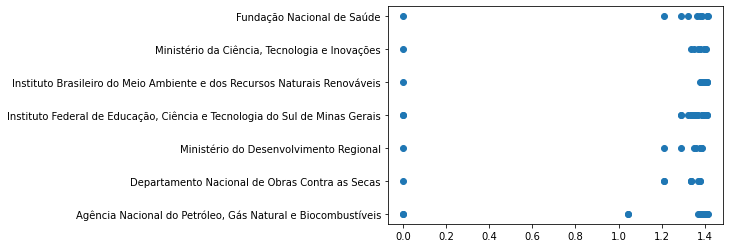

In [ ]:
plt.scatter(distances,names_similar)

In [ ]:
from scipy.spatial import distance_matrix
pd.DataFrame(distance_matrix(distances, distances), index=df['orgao_no_unidade_organizacional'], columns=df['orgao_no_unidade_organizacional'])

orgao_no_unidade_organizacional,"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis","Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",Departamento Nacional de Obras Contra as Secas,Fundação Nacional de Saúde,Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,"Instituto Federal de Educação, Ciência e Tecnologia do Sul de Minas Gerais","Instituto Federal de Educação, Ciência e Tecnologia do Sul de Minas Gerais","Ministério da Ciência, Tecnologia e Inovações",Ministério do Desenvolvimento Regional
orgao_no_unidade_organizacional,,,,,,,,,
"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",0.000000,0.002518,0.004084,0.002872,0.007303,0.003231,0.003737,0.001984,0.002166
"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",0.002518,0.000000,0.001716,0.001067,0.009399,0.001175,0.001355,0.000884,0.000789
Departamento Nacional de Obras Contra as Secas,0.004084,0.001716,0.000000,0.001479,0.010917,0.001176,0.000582,0.002301,0.002109
Fundação Nacional de Saúde,0.002872,0.001067,0.001479,0.000000,0.009648,0.000616,0.001344,0.001344,0.000934
Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,0.007303,0.009399,0.010917,0.009648,0.000000,0.009863,0.010643,0.008718,0.008922
"Instituto Federal de Educação, Ciência e Tecnologia do Sul de Minas Gerais",0.003231,0.001175,0.001176,0.000616,0.009863,0.000000,0.001142,0.001473,0.001179
"Instituto Federal de Educação, Ciência e Tecnologia do Sul de Minas Gerais",0.003737,0.001355,0.000582,0.001344,0.010643,0.001142,0.000000,0.002028,0.001859
"Ministério da Ciência, Tecnologia e Inovações",0.001984,0.000884,0.002301,0.001344,0.008718,0.001473,0.002028,0.000000,0.000817
Ministério do Desenvolvimento Regional,0.002166,0.000789,0.002109,0.000934,0.008922,0.001179,0.001859,0.000817,0.000000


https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
# converting to CSV file
result.to_csv("matriz.csv")

In [ ]:
 #converting to CSV file
tab.to_excel("tabela.xlsx")

In [ ]:
#https://linktr.ee/thiagobc23

In [ ]:
import nltk
# baixando o corpus
nltk.download('mac_morpho')
nltk.corpus.mac_morpho.words()

# vendo algumas tags
nltk.corpus.mac_morpho.tagged_words()